# Analysis of data from public WhatsApp groups
Exploration and visualization of the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import unicodedata, re, itertools, sys
from urllib.request import urlopen
import json
import plotly.express as px
import emoji, re, string, time, os, pickle

from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

sns.set(style="darkgrid")

In [2]:
base = '2018'
show = False
preprocessed = False

In [3]:
data_dir = 'data/' + str(base) #+ '/vis_processed_texts.p'
for filename in os.listdir(data_dir):
    #print(filename)
    if filename == 'vis_processed_texts.p':
        preprocessed = True
preprocessed        

True

In [4]:
filepath = data_dir + '/fakeWhatsApp.BR_' + str(base) + '.csv'
df = pd.read_csv(filepath)  #('data/2020/wpp_2020_stage1.csv')
#df = pd.read_csv('/home/cabral/Documents/FakeWhatsApp.Br private data/data/2020/wpp_2020_stage1.csv')
df.head(5)

C:\Users\lucas.carneiro\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


id      date   hour ddi country country_iso3 ddd  \
0  3631133147603888180  01/08/18  13:13  55  BRASIL          BRA  17   
1  3631133147603888180  01/08/18  13:24  55  BRASIL          BRA  17   
2 -4391661641377612003  01/08/18  13:28  55  BRASIL          BRA  13   
3 -4391661641377612003  09/08/18  14:46  55  BRASIL          BRA  13   
4  4080266983443972531  09/08/18  07:58  55  BRASIL          BRA  17   

       state   group  midia  url  characters  words  viral  sharings  \
0  São Paulo  2018_1      1    0          25      4      0         1   
1  São Paulo  2018_1      0    0          58      9      1         2   
2  São Paulo  2018_1      0    0           5      1      0         1   
3  São Paulo  2018_1      1    0          25      4      0         1   
4  São Paulo  2018_1      1    0          25      4      0         1   

                                                text  misinformation  \
0                          <Arquivo de mídia oculto>               0   
1  O Bolsonaro tem que estar preparado pra respon...               0   
2                                              Boaaa               0   
3                          <Arquivo de mídia oculto>               0   
4                          <Arquivo de mídia oculto>               0   

                             preprocessed_text  
0                      arquivar mídia ocultar   
1  o bolsonaro estar preparar responder assim   
2                                        boaaa  
3                      arquivar mídia ocultar   
4                      arquivar mídia ocultar

In [5]:
def haveWord(word,text):
    word = word.lower()
    text = str(text).lower()
    if word in text:
        return True
    else:
        return False
    
def haveRegex(regex,text):
    matches = re.findall(regex,text)
    if matches:
        return True
    else:
        return False

In [6]:
df_medias = pd.read_csv('data/2018/wpp_labels - original midia.csv')
df_medias

ORIGINAL_MIDIA
0     https://www.facebook.com/watch/?v=719124731853172
1           https://www.youtube.com/watch?v=UG9CROVxRuc
2           https://www.youtube.com/watch?v=XNyU5A1ATJ0
3           https://www.youtube.com/watch?v=Sq07qscA4HM
4           https://www.youtube.com/watch?v=53_A19JvCZ8
...                                                 ...
1207        https://www.youtube.com/watch?v=656eRL_ADTM
1208        https://www.youtube.com/watch?v=10nCy4F7Yxw
1209                                                  ?
1210  https://www.facebook.com/watch/?v=236691373664068
1211        https://www.youtube.com/watch?v=XCTG6vj6beg

[1212 rows x 1 columns]

In [7]:
df_q = df_medias[df_medias.apply(lambda x: haveWord('http',x['ORIGINAL_MIDIA']),axis=1)]
df_q

ORIGINAL_MIDIA
0     https://www.facebook.com/watch/?v=719124731853172
1           https://www.youtube.com/watch?v=UG9CROVxRuc
2           https://www.youtube.com/watch?v=XNyU5A1ATJ0
3           https://www.youtube.com/watch?v=Sq07qscA4HM
4           https://www.youtube.com/watch?v=53_A19JvCZ8
...                                                 ...
1206  https://www.facebook.com/watch/?v=235193174018889
1207        https://www.youtube.com/watch?v=656eRL_ADTM
1208        https://www.youtube.com/watch?v=10nCy4F7Yxw
1210  https://www.facebook.com/watch/?v=236691373664068
1211        https://www.youtube.com/watch?v=XCTG6vj6beg

[610 rows x 1 columns]

In [8]:
print('twitter',len(df_q[df_q.apply(lambda x: haveWord('twitter',x['ORIGINAL_MIDIA']),axis=1)]))
print('facebook',len(df_q[df_q.apply(lambda x: haveWord('facebook',x['ORIGINAL_MIDIA']),axis=1)]))
print('youtube',len(df_q[df_q.apply(lambda x: haveWord('youtu',x['ORIGINAL_MIDIA']),axis=1)]))

df_not  = df_q[df_q.apply(lambda x: not haveWord('twitter',x['ORIGINAL_MIDIA']),axis=1)]
df_not  = df_not[df_not.apply(lambda x: not haveWord('facebook',x['ORIGINAL_MIDIA']),axis=1)]
df_not  = df_not[df_not.apply(lambda x: not haveWord('youtu',x['ORIGINAL_MIDIA']),axis=1)]

print('others', len(df_not))

list(df_not['ORIGINAL_MIDIA'])

twitter 85
facebook 236
youtube 240
others 49


['https://rd1.com.br/em-suposto-audio-susana-vieira-apoia-bolsonaro-e-critica-haddad-ouca/',
 'https://redesoberania.com.br/artigos/jair-e-haddad-leitura-fundamentalista-seletiva-e-instrumentalizada-da-biblia/',
 'https://veja.abril.com.br/politica/ibope-haddad-ultrapassa-bolsonaro-na-cidade-de-sao-paulo/',
 'https://www.pautanoticias.com.br/index.php/2018/10/10/magno-malta-e-vicentinho-jr-farao-em-reuniao-em-palmas-nesta-quarta-feira10-bolsonaristas-prometem-protestar-contra-alianca/',
 'https://noticias.uol.com.br/politica/eleicoes/2018/noticias/2018/06/15/tse-confirma-fundo-de-r-17-bi-para-eleicao-e-divulga-cota-de-partidos.htm',
 'https://www.migalhas.com.br/quentes/289004/magistrados-terao-de-se-explicar-ao-cnj-por-manifestacoes-publicas-proibidas-nas-eleicoes',
 'https://g1.globo.com/pr/parana/noticia/divulgacao-do-filme-da-lava-jato-leva-montanha-de-dinheiro-falso-ao-centro-de-curitiba.ghtml',
 'https://br.blastingnews.com/politica/2017/05/parece-hoje-veja-o-que-eneas-disse-sobr

# Basic statistics

In [9]:
df.describe()[['characters','words','sharings']]

characters          words       sharings
count  146923.000000  146923.000000  146923.000000
mean      148.459077      22.890344       2.221109
std       527.276765      80.861636       6.629938
min         1.000000       1.000000       1.000000
25%        19.000000       2.000000       1.000000
50%        36.000000       6.000000       1.000000
75%        98.000000      14.000000       1.000000
max     65536.000000    5486.000000      91.000000

In [10]:
#df = df[df['words'] < 4000]
#df.describe()[['characters','words','sharings']]

In [11]:
total_msg = len(df)
total_groups = len(df['group'].unique())
total_users = len(df['id'].unique())
print('Total groups analyzed: ',total_groups)
print('Total unique users: ', total_users)
print('Total messages: ', total_msg)
print('Message/user ratio: ', total_msg/len(df['id'].unique()))

Total groups analyzed:  59
Total unique users:  5364
Total messages:  146923
Message/user ratio:  27.390566741237883


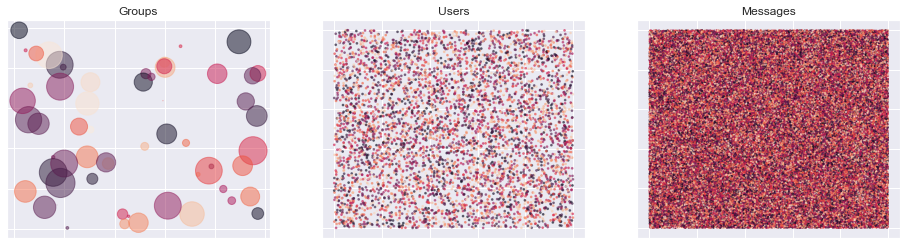

In [12]:
#Visualization of scale
# Fixing random state for reproducibility
np.random.seed(42)

plt.figure(figsize=(16, 4))

### grupos
N = total_groups
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.subplot(131)
plt.title('Groups')
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.tick_params(
    axis = 'both',
    left = False,
    right = False,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft = False) # labels along the bottom edge are off

#####users
N = total_users
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)

plt.subplot(132)
plt.title('Users')
plt.scatter(x, y, s=3, c=colors, alpha=0.5)
plt.tick_params(
    axis = 'both',
    left = False,
    right = False,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft = False) # labels along the bottom edge are off

#####msgs
N = total_msg
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)

plt.subplot(133)
plt.title('Messages')
plt.scatter(x, y, s=1, c=colors, alpha=0.5)
plt.tick_params(
    axis = 'both',
    left = False,
    right = False,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft = False) # labels along the bottom edge are off

plt.show()

## Proportions

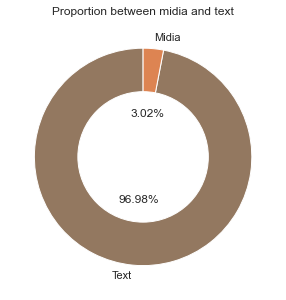

In [13]:
# midia and text
#plt.style.use('default')
#plt.style.use('bmh')
plt.figure(figsize=(5, 5))
plt.title('Proportion between midia and text')
x = [len(df[df['midia']==0]),len(df[df['midia']==1])]
names = ['Text','Midia']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C5','C1'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

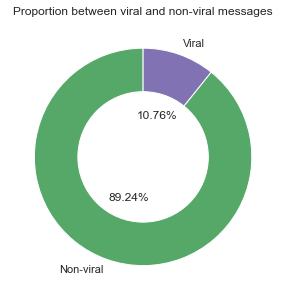

In [14]:
#sharings
#plt.style.use('bmh')
plt.figure(figsize=(5, 5))
plt.title('Proportion between viral and non-viral messages')
x = [len(df[df['viral']==0]),len(df[df['viral']==1])]
names = ['Non-viral','Viral']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C2','C4'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

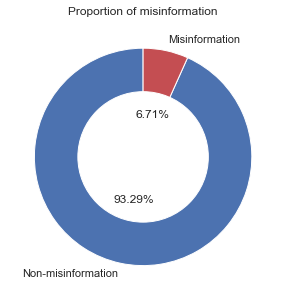

In [15]:
#misinformation
#plt.style.use('bmh')
plt.figure(figsize=(5, 5))
plt.title('Proportion of misinformation')
x = [len(df[df['misinformation']==0]),len(df[df['misinformation']==1])]
names = ['Non-misinformation','Misinformation']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C0','C3'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Misinformation statistics

In [16]:
# samples
print('misinformation\n')
m_list = (list(df[df['misinformation']==1]['text'].sample(n=3, random_state=42)))
for m in m_list:
    print(m)
    print('******')
print()

print('non-misinformation\n')
m_list = (list(df[(df['misinformation']==0) & (df['midia']==0)]['text'].sample(n=3, random_state=42)))
for m in m_list:
    print(m)
    print()
print()

misinformation

Marina Silva sofre atentado e é internada as pressas! 

Mais um ato de violência e intolerância na política brasileira!!!
******
*Pesquisa ibope mostra Fernando Haddad 49%  Jair Bolsonaro com 51% e que Haddad pode ganhar de virada*

 https://g1.globo.com https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcTu8G-W0iEFB7QbWgrqjsTtmofCMcY9Gp1MrRrI5XQ3LDeqGmG-cmSGKTqF
******
A Globo News terminou de confirmar que o PT alterou o resultado da pesquisas nas capitais e tá espalhando como fake News
******

non-misinformation

Baixa pelo pc

por isso perço perdao por ter chamado de zé

Orgulho do Maranhão




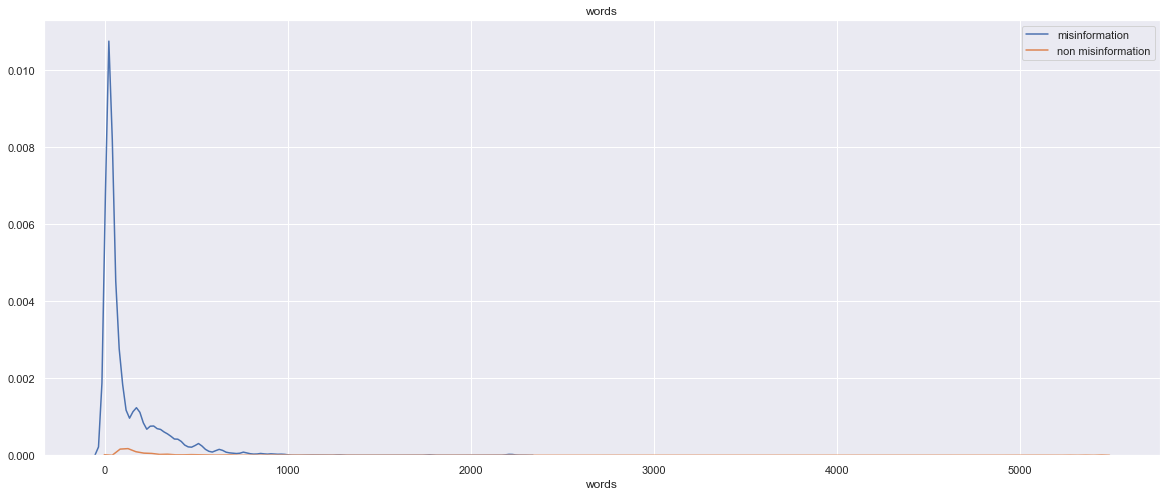

In [17]:
plt.figure(figsize=(20, 8))
plt.title('words')
sns.distplot(df[(df['midia'] == 0) & (df['misinformation'] == 1)]['words'], hist = False, kde = True, label = 'misinformation')
sns.distplot(df[(df['midia'] == 0) & (df['misinformation'] == 0)]['words'], hist = False, kde = True, label = 'non misinformation')
plt.show()

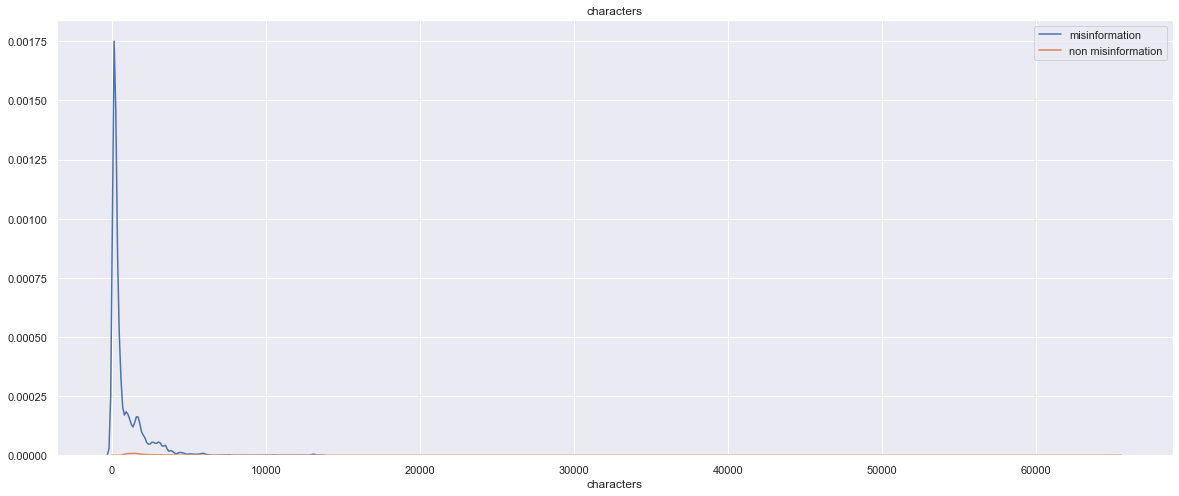

In [18]:
plt.figure(figsize=(20, 8))
plt.title('characters')
sns.distplot(df[(df['midia'] == 0) & (df['misinformation'] == 1)]['characters'], hist = False, kde = True, label = 'misinformation')
sns.distplot(df[(df['midia'] == 0) & (df['misinformation'] == 0)]['characters'], hist = False, kde = True, label = 'non misinformation')
plt.show()

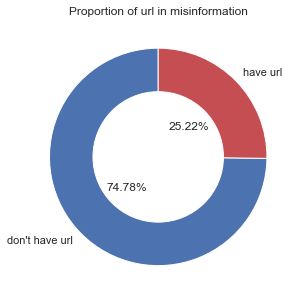

In [19]:
plt.figure(figsize=(5, 5))
plt.title('Proportion of url in misinformation')

not_url = len(df[(df['url']==0) & (df['misinformation']==1)])
url = len(df[(df['url']==1) & (df['misinformation']==1)])
x = [not_url,url]
names = ['don\'t have url','have url']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C0','C3'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Geographic data

In [20]:
#plt.style.use('default')
df_br_states = df[(df['state'] != '?') & (df['state'] != 'Estrangeiro') ]
counts = df_br_states.groupby(by='state').count()['id'].sort_index(ascending=False)
non_mis_counts = df_br_states[df_br_states['misinformation'] == 0].groupby(by='state').count()['id'].sort_index(ascending=False) 
misinformations_counts = df_br_states[df_br_states['misinformation'] == 1].groupby(by='state').count()['id'].sort_index(ascending=False) 
states = list(counts.index)
ratio = np.true_divide(misinformations_counts.values,counts.values)
mis_by_state = pd.DataFrame({'state':states,
                             'total messages':counts.values,
                             'non-misinformation':non_mis_counts,
                             'misinformation':misinformations_counts,
                             'ratio':ratio})
#mis_by_state.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')
mis_by_state

state  total messages  non-misinformation  \
state                                                                          
Tocantins                      Tocantins           18063               16423   
São Paulo                      São Paulo           23960               22470   
Sergipe                          Sergipe            1661                1564   
Santa Catarina            Santa Catarina            6469                6013   
Roraima                          Roraima             300                 280   
Rondônia                        Rondônia             769                 735   
Rio de Janeiro            Rio de Janeiro           11065               10302   
Rio Grande do Sul      Rio Grande do Sul            2103                1948   
Rio Grande do Norte  Rio Grande do Norte            1956                1838   
Piauí                              Piauí            2660                2478   
Pernambuco                    Pernambuco            5634                5256   
Pará                                Pará            2742                2427   
Paraíba                          Paraíba            1262                1210   
Paraná                            Paraná            3921                3558   
Minas Gerais                Minas Gerais            8785                8121   
Mato Grosso do Sul    Mato Grosso do Sul            1672                1494   
Mato Grosso                  Mato Grosso            2370                2147   
Maranhão                        Maranhão           11506               11143   
Goiás                              Goiás            6649                6135   
Espírito Santo            Espírito Santo             744                 651   
Distrito Federal        Distrito Federal            3715                3335   
Ceará                              Ceará            5116                4702   
Bahia                              Bahia            5500                5157   
Amazonas                        Amazonas           11748               11485   
Amapá                              Amapá             180                 168   
Alagoas                          Alagoas             212                 202   
Acre                                Acre             261                 253   

                     misinformation     ratio  
state                                          
Tocantins                      1640  0.090793  
São Paulo                      1490  0.062187  
Sergipe                          97  0.058399  
Santa Catarina                  456  0.070490  
Roraima                          20  0.066667  
Rondônia                         34  0.044213  
Rio de Janeiro                  763  0.068956  
Rio Grande do Sul               155  0.073704  
Rio Grande do Norte             118  0.060327  
Piauí                           182  0.068421  
Pernambuco                      378  0.067093  
Pará                            315  0.114880  
Paraíba                          52  0.041204  
Paraná                          363  0.092578  
Minas Gerais                    664  0.075583  
Mato Grosso do Sul              178  0.106459  
Mato Grosso                     223  0.094093  
Maranhão                        363  0.031549  
Goiás                           514  0.077305  
Espírito Santo                   93  0.125000  
Distrito Federal                380  0.102288  
Ceará                           414  0.080923  
Bahia                           343  0.062364  
Amazonas                        263  0.022387  
Amapá                            12  0.066667  
Alagoas                          10  0.047170  
Acre                              8  0.030651

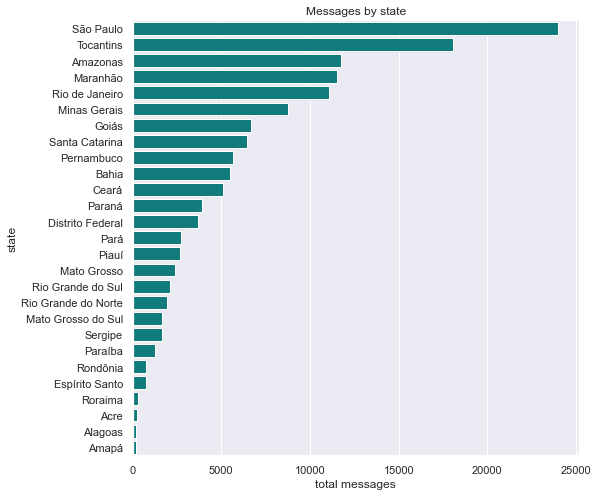

In [21]:
mis_by_state = mis_by_state.sort_values(by = 'total messages', ascending = False)
plt.figure(figsize=(8, 8))
plt.title('Messages by state')
sns.barplot(y='state',x='total messages', data = mis_by_state, color = 'darkcyan')
plt.show()

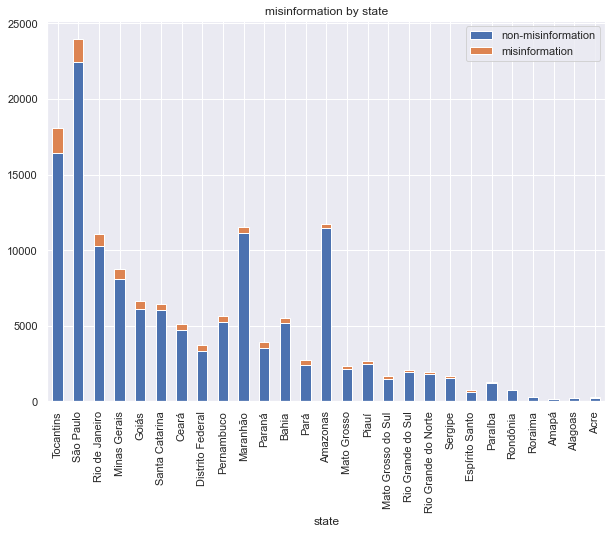

In [22]:
t = 'misinformation by state'
mis_by_state = mis_by_state.sort_values(by = 'misinformation', ascending = False)
mis_by_state.loc[:,['non-misinformation', 'misinformation']].plot.bar(stacked=True, figsize=(10,7),title = t)

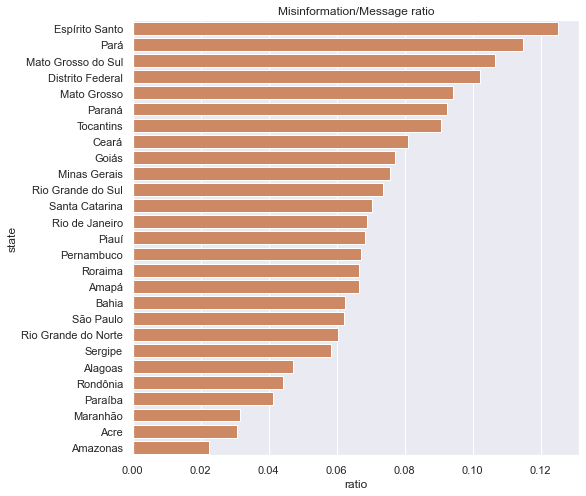

In [23]:
mis_by_state = mis_by_state.sort_values(by = 'ratio', ascending = False)
plt.figure(figsize=(8, 8))
plt.title('Misinformation/Message ratio')
sns.barplot(y='state', x ='ratio', data = mis_by_state, color = 'C1')
plt.show()

### Maps

In [24]:
geobr = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
with urlopen(geobr) as response:
    geo_states = json.load(response)

In [25]:
#messages
fig = px.choropleth(mis_by_state, geojson = geo_states, locations='state',featureidkey="properties.name",
                           color='total messages',
                           color_continuous_scale="blues",
                           #range_color=(0, 0.07),
                           scope="south america",
                           labels={'ratio':'misinformation/message ratio'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("plots/"+str(base)+"/map_messages_br_states.html")

if show:
    fig.show()

In [26]:
#ratio
fig = px.choropleth(mis_by_state, geojson = geo_states, locations='state',featureidkey="properties.name",
                           color='ratio',
                           color_continuous_scale="oranges",
                           range_color=(0, 0.07),
                           scope="south america",
                           labels={'ratio':'misinformation/message ratio'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("plots/"+str(base)+"/map_ratio_br_states.html")
if show:
    fig.show()

## Other countries

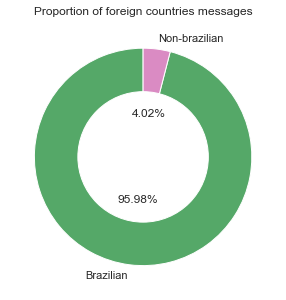

In [27]:
#misinformation
#plt.style.use('bmh')
plt.figure(figsize=(5, 5))
plt.title('Proportion of foreign countries messages')
x = [len(df[df['country']=='BRASIL']),len(df[df['country']!='BRASIL'])]
names = ['Brazilian','Non-brazilian']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C2','C6'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [28]:
#plt.style.use('default')
df_foreign = df[(df['state'] == 'Estrangeiro')]
counts = df_foreign.groupby(by='country').count()['id'].sort_index(ascending=False)
non_mis_counts = df_foreign[df_foreign['misinformation'] == 0].groupby(by='country').count()['id'].sort_index(ascending=False) 

misinformations_counts = df_foreign[df_foreign['misinformation'] == 1].groupby(by='country').count()['id'].sort_index(ascending=False) 
mis_dict = dict(misinformations_counts)
mis_keys = list(non_mis_counts.index)
mis_values = [mis_dict.get(m,0) for m in mis_keys]
mis_dict = dict(zip(mis_keys,mis_values))
misinformations_counts = pd.Series(mis_dict)

country2ISO3 = {
    'ESTADOS UNIDOS':'USA',
    'PORTUGAL':'PRT',
    'BRASIL':'BRA',
    'PAQUISTÃO':'PAK',
    'PARAGUAI':'PRY',
    'ESPANHA':'ESP',
    'ITÁLIA':'ITA',
    'ILHA DE MAN':'IMN',
    'ALEMANHA':'DEU',
    'SURINAME':'SUR',
    'VENEZUELA':'VEN',
    'FRANÇA':'FRA',
    'ILHAS COCOS (KEELING)':'CCK',
    'BOLÍVIA':'BOL',
    'ANGOLA':'AGO',
    'ARGENTINA':'ARG',
    'MARROCOS':'MAR',
    'RÚSSIA':'RUS',
    'NOVA ZELANDIA':'NZL',
    'ÍNDIA':'IND',
    'ÁFRICA DO SUL':'ZAF',
    'IÊMEN':'YEM',
    'EGITO':'EGY',
    'TURQUIA':'TUR',
    'MOÇAMBIQUE':'MOZ',
    'GUIANA':'GUY',
    'BENIM':'BEN',
    'COLÔMBIA':'COL',
    'BÉLGICA':'BEL',
    'PERU':'PER',
    'NORUEGA':'NOR',
    'ARÁBIA SAUDITA':'SAU',
    'SUIÇA':'CHE',
    'GANA':'GHA',
    'MÉXICO':'MEX',
    'CHILE':'CHL',
    'SÃO TOMÉ E PRÍNCIPE':'STP',
    'JAPÃO':'JPN',
    'IRÃ':'IRN',
    'INDONÉSIA':'IDN',
    'GUATEMALA':'GTM',
    'PAÍSES BAIXOS':'NLD',
    'SRI LANKA':'LKA',
    'EQUADOR':'ECU',
    'CABO VERDE':'CPV',
    'URUGUAI':'URY',
    'SUÉCIA':'SWE'
}
country = list(counts.index)
iso3 = [country2ISO3[c] for c in country]

ratio = np.true_divide(misinformations_counts.values, counts.values)
mis_by_country = pd.DataFrame({'country':country,
                             'iso3': iso3, 
                             'total messages':counts.values,
                             'non-misinformation':non_mis_counts,
                             'misinformation':misinformations_counts,
                             'ratio':ratio})
mis_by_country = mis_by_country.sort_values(by= 'total messages', ascending = False)
mis_by_country

country iso3  total messages  \
country                                                             
ESTADOS UNIDOS                ESTADOS UNIDOS  USA             464   
PARAGUAI                            PARAGUAI  PRY             123   
FRANÇA                                FRANÇA  FRA             120   
PORTUGAL                            PORTUGAL  PRT              71   
BOLÍVIA                              BOLÍVIA  BOL              64   
ESPANHA                              ESPANHA  ESP              44   
NOVA ZELANDIA                  NOVA ZELANDIA  NZL              43   
ITÁLIA                                ITÁLIA  ITA              30   
ILHAS COCOS (KEELING)  ILHAS COCOS (KEELING)  CCK              20   
ILHA DE MAN                      ILHA DE MAN  IMN              17   
SURINAME                            SURINAME  SUR              15   
PAQUISTÃO                          PAQUISTÃO  PAK               3   
ANGOLA                                ANGOLA  AGO               2   
VENEZUELA                          VENEZUELA  VEN               2   
MARROCOS                            MARROCOS  MAR               2   
RÚSSIA                                RÚSSIA  RUS               1   
ARGENTINA                          ARGENTINA  ARG               1   
ÍNDIA                                  ÍNDIA  IND               1   

                       non-misinformation  misinformation     ratio  
country                                                              
ESTADOS UNIDOS                        407              57  0.122845  
PARAGUAI                              122               1  0.008130  
FRANÇA                                120               0  0.000000  
PORTUGAL                               60              11  0.154930  
BOLÍVIA                                63               1  0.015625  
ESPANHA                                42               2  0.045455  
NOVA ZELANDIA                          42               1  0.023256  
ITÁLIA                                 27               3  0.100000  
ILHAS COCOS (KEELING)                  19               1  0.050000  
ILHA DE MAN                            16               1  0.058824  
SURINAME                               15               0  0.000000  
PAQUISTÃO                               3               0  0.000000  
ANGOLA                                  2               0  0.000000  
VENEZUELA                               2               0  0.000000  
MARROCOS                                2               0  0.000000  
RÚSSIA                                  1               0  0.000000  
ARGENTINA                               1               0  0.000000  
ÍNDIA                                   1               0  0.000000

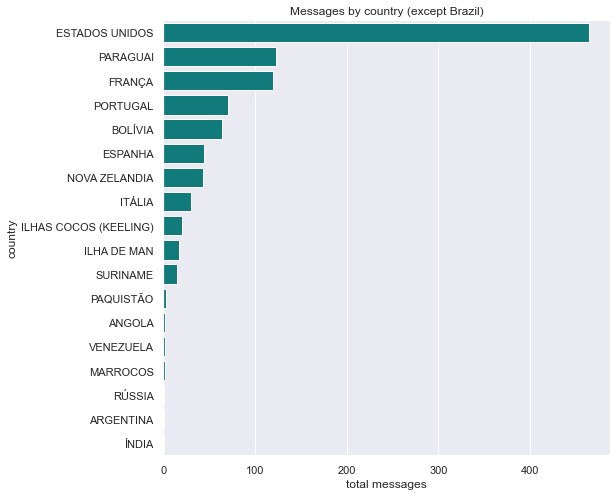

In [29]:
plt.figure(figsize=(8, 8))
plt.title('Messages by country (except Brazil)')
sns.barplot(y='country',x='total messages', data = mis_by_country, color = 'darkcyan')
plt.show()

In [30]:
geo = 'https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson'
with urlopen(geo) as response:
    geo_world = json.load(response)

In [31]:
geo_world['features'][0]['properties']

{'ADMIN': 'Aruba', 'ISO_A3': 'ABW', 'ISO_A2': 'AW'}

In [32]:
#total messages
fig = px.choropleth(mis_by_country, geojson = geo_world, locations='iso3',featureidkey="properties.ISO_A3",
                           color='total messages',
                           color_continuous_scale="algae",
                           #range_color=(0, 14),
                           #scope="south america",
                           labels={'total messages':'total messages'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("plots/"+str(base)+"/map_messages_world.html")
if show:
    fig.show()

# Time series analysis

In [33]:
def custom_time(data,hora):
    string = data + " " + hora
    return string
df['timestamp'] = df.apply(lambda x: custom_time(x['date'],x['hour']),axis=1)

In [34]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%y %H:%M')
timeseries = df.groupby('timestamp').count()['id']
#timeseries = timeseries.sort_index()
fig = px.line(x=timeseries.index, y=timeseries.values, title = 'Timeseries visualization')
fig.show()

In [35]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
timeseries = df.groupby('date').count()['id']
timeseries = timeseries.sort_index()
fig = px.line(x=timeseries.index, y=timeseries.values, title = 'Timeseries visualization by day')
fig.show()

In [36]:
df['hour'] = pd.to_datetime(df['hour'], format = '%H:%M' )
timeseries = df.groupby('hour').count()['id']
timeseries = timeseries.sort_index()
fig = px.line(x=timeseries.index, y=timeseries.values, title = 'Timeseries visualization by hour')
fig.show()

# Distribuitions

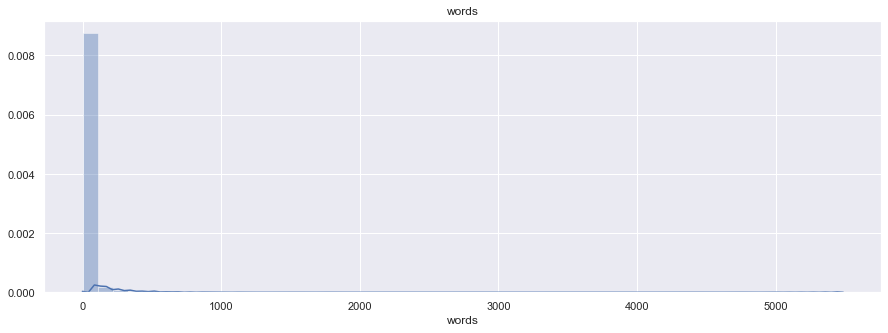

In [37]:
plt.figure(figsize=(15, 5))
plt.title('words')
sns.distplot(df[df['midia'] == 0]['words'], rug = False, kde = True)
plt.show()

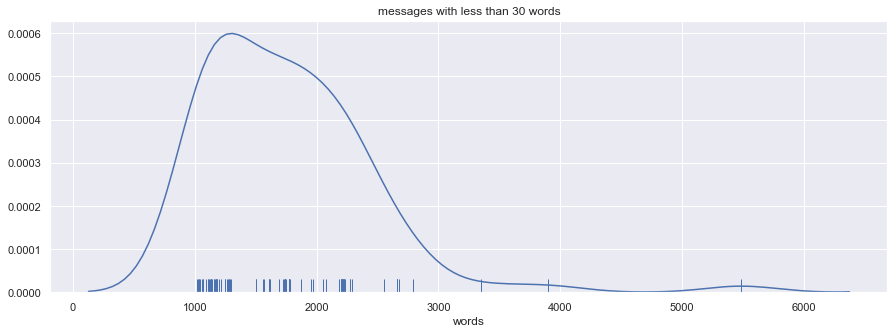

In [38]:
plt.figure(figsize=(15, 5))
plt.title('messages with less than 30 words')
sns.distplot(df[(df['midia'] == 0) & (df['words'] > 1000)]['words'], hist = False, rug = True, kde = True)
#plt.show()

In [39]:
# Distribuition name??

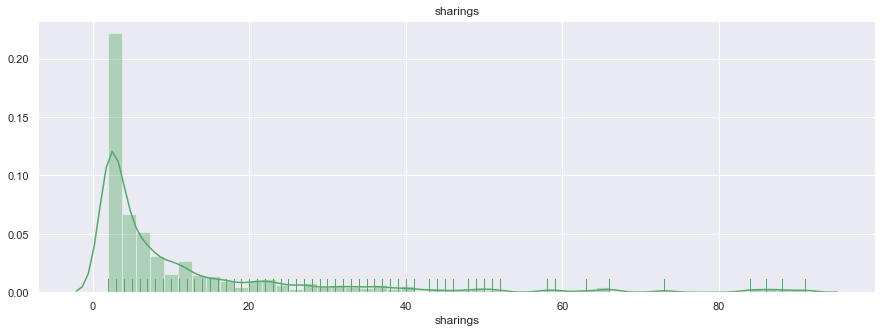

In [40]:
plt.figure(figsize=(15, 5))
plt.title('sharings')
sns.distplot(df[df['sharings'] > 1]['sharings'], rug = True, kde = True, color = 'C2')
plt.show()

# Most active users

In [41]:
df['text'] = [str(m) for m in df['text']]

def getUserData(df,users):
    '''
    Creates a DataFrame with most active users information
    Input: DataFrame with all data, number of users desired
    Output: DataFrame with number of messages, number of texts, number of midia files, ddd, ddi, state, country and all texts
    '''
    texto = []
    midia = []
    pais = []
    estado = []
    ddd = []
    ddi = []
    msg_str = []
    for user in users.index:
        texto.append(len(df[(df['id'] == user) & (df['midia']==0)]))
        midia.append(len(df[(df['id'] == user)]) - len(df[(df['id'] == user) & (df['midia']==0)]))
        pais.append(df[df['id']==user].iloc[0]['country'])
        estado.append(df[df['id']==user].iloc[0]['state'])
        ddd.append(df[df['id']==user].iloc[0]['ddd'])
        ddi.append(df[df['id']==user].iloc[0]['ddi'])
        msgs = df[(df['id']==user) & (df['midia']==0)]['text']
        msgs = list(msgs.values)
        msgs = " <-> ".join(msgs)
        msg_str.append(msgs)
        
    topUsers = pd.DataFrame({'id':users.index, 'count messsages':users.values, 
                             'texts':texto, 'midia':midia,
                             'ddi':ddi,'ddd':ddd,'country':pais,
                             'state':estado,'messages':msg_str})    
    return topUsers
    

def getTopUsers(df,top=20):
    groupedByid = df.groupby(['id']).count()
    groupedByid = groupedByid.sort_values('date', ascending=False)[0:top]['date']
    return getUserData(df,groupedByid)

topUsers = getTopUsers(df,10)
topUsers

id  count messsages  texts  midia  ddi ddd country  \
0 -3818310068976662355             3134   3133      1   55  11  BRASIL   
1  2839535797075678550             1330   1329      1   55  63  BRASIL   
2 -2072140886659020977              855    854      1   55  67  BRASIL   
3 -7379073963651272087              845    844      1   55  92  BRASIL   
4  3201344459315743060              831    830      1   55  92  BRASIL   
5   484315296795177283              810    809      1   55  99  BRASIL   
6   170916900626840870              805    804      1   55  31  BRASIL   
7 -3545133711641780471              764    763      1   55  92  BRASIL   
8   620937769575483159              696    695      1   55  63  BRASIL   
9 -4100792812416892756              651    650      1   55  88  BRASIL   

                state                                           messages  
0           São Paulo  Ontem eu vi um vídeo de um travesti xingando a...  
1           Tocantins  *Ordem em meio a caos, o sucesso das escolas m...  
2  Mato Grosso do Sul  Kkkk as urnas que são fraudadas kkkk essa desc...  
3            Amazonas  😂😂😂😂😂 <-> 👏🏻👏🏻👏🏻👏🏻👏🏻 <-> Alguém tem o vídeo da...  
4            Amazonas  Boa noite caros amigos! <-> 🤝🏼 <-> Seja bem vi...  
5            Maranhão  Cara <-> Assisto os vídeos do Eneas hj em dia ...  
6        Minas Gerais  Para bom entendedor meia palavra basta.\nNo ge...  
7            Amazonas  Sim. <-> Obrigado @559293118293 <-> https://tw...  
8           Tocantins  🤝🇧🇷 <-> Uma Lixeira recheada de lixo humano <-...  
9               Ceará  👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻 <-> *Triste notícia:*\nHoje p...

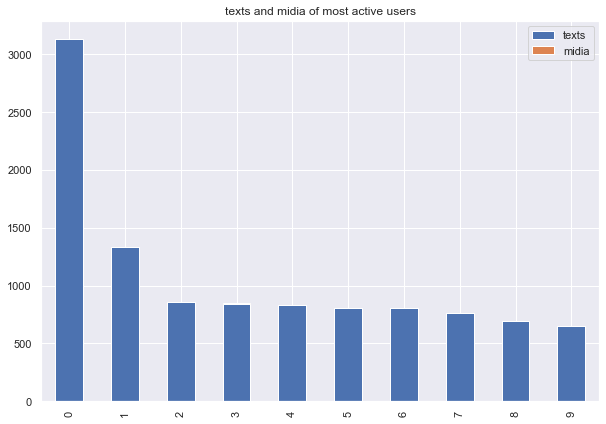

In [42]:
t = 'texts and midia of most active users'
topUsers.loc[:,['texts', 'midia']].plot.bar(stacked=True, figsize=(10,7),title= t)
plt.show()

# Users that shared more midia
Possible bot activity

In [43]:
def getTopMidiaUsers(df,top=20):
    groupedByID = df[df['midia']==1].groupby(['id']).count()
    groupedByID = groupedByID.sort_values('date', ascending=False)[0:top]['date']
    return getUserData(df,groupedByID)

topMidia = getTopMidiaUsers(df,10)
topMidia

id  count messsages  texts  midia ddi ddd country  \
0 -7481691239712874829             1360    972   1360   ?   ?       ?   
1 -7481691239712874829             1118    466   1118  55  14  BRASIL   
2 -7481691239712874829             1116    948   1116  55  67  BRASIL   
3 -7481691239712874829              982    828    982  55  31  BRASIL   
4 -7481691239712874829              883    388    883  55  61  BRASIL   
5 -7481691239712874829              882    284    882  55  91  BRASIL   
6 -7481691239712874829              741    279    741  55  31  BRASIL   
7 -7481691239712874829              683    272    683  55  63  BRASIL   
8 -7481691239712874829              654   3742    654  55  11  BRASIL   
9 -7481691239712874829              556    515    556  55  18  BRASIL   

                state                                           messages  
0                   ?  Fazer campanha contraria tbm ajuda <-> É verda...  
1           São Paulo  Motor elétrico trifásico de 96 volts e 71 cava...  
2  Mato Grosso do Sul  Kkkk as urnas que são fraudadas kkkk essa desc...  
3        Minas Gerais  Para bom entendedor meia palavra basta.\nNo ge...  
4    Distrito Federal  Liturgia Diária\nVoltar\nQuer ver a Liturgia d...  
5                Pará  Olha aí Representantes de ONGs ensinando os ve...  
6        Minas Gerais  Acabou de explodir o gasômetro da Usiminas <->...  
7           Tocantins  Bolsonaro já está eleito nos EUA, e o primeiro...  
8           São Paulo  Ontem eu vi um vídeo de um travesti xingando a...  
9           São Paulo  👏🏼👏🏼👏🏼😎😂 <-> 💪👊🏼🤜👊🏼😎😎😂😂 <-> https://sajjasite....

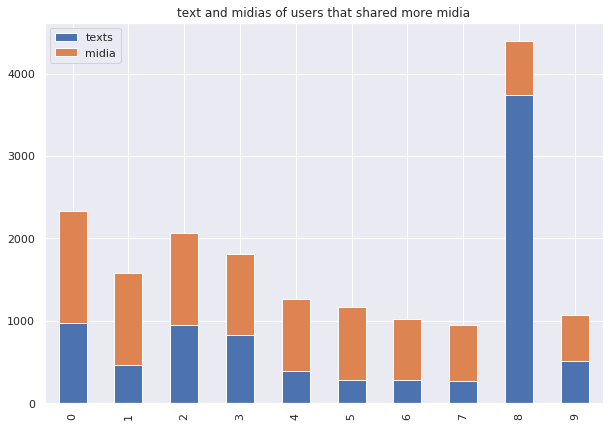

In [44]:
t = 'text and midias of users that shared more midia'
topMidia.loc[:,['texts', 'midia']].plot.bar(stacked=True, figsize=(10,7),title= t)
plt.show()

# Messages more shared in different groups

In [45]:
#df = df.groupby('domain')['ID'].nunique()
msg_group = df[df['viral']==1][['text','group']]
msg_group = msg_group.groupby('text')['group'].nunique()
msg_group = msg_group.sort_values(ascending=False)
topMsgs = msg_group[0:10]
topMsgs = topMsgs.to_frame()
topMsgs

group
text                                                     
_*TSE informa:*_ 7,2 milhões de votos anulados ...     34
Sem palavras, só divulgue para seus contatos e ...     34
Vamos fazer campanha inteligente e garantir a v...     32
Vamos dar "dislike" nos vídeos dos artistas "ro...     30
Enquete para presidência! *Quem é seu candidato...     29
Golpe, Golpe, Golpe... Adelio foi autorizado a ...     29
Nota Oficial :\n\nPessoal aqui quem lhe falam é...     29
Vota aí e repassa!!!      Vamos ver se o ibope ...     28
Olha só que ideia interessante...\n\nSe formos ...     27
*ATENÇÃO ELEITORES DE BOLSONARO*❗\n\nBolsonaro ...     27

# Viral messages
Possible misinformation

In [46]:
groupedByMsg = df[(df['midia'] == 0) & (df['text'] != 'Aguardando esta mensagem') & 
                  (df['text'] != 'Mensagem incompatível') & 
                  (df['text'] != 'Esta mensagem foi apagada') & (df['text'] != 'nan') & 
                  (df['words'] > 3)].groupby(['text']).count()
groupedByMsg = groupedByMsg.sort_values('date', ascending=False)['id']
groupedByMsg = pd.DataFrame(groupedByMsg)
groupedByMsg = groupedByMsg.rename(columns={'id':'count'})
groupedByMsg = groupedByMsg[groupedByMsg['count'] > 1]
groupedByMsg[0:10]

count
text                                                     
_*TSE informa:*_ 7,2 milhões de votos anulados ...     91
Sem palavras, só divulgue para seus contatos e ...     88
Vamos fazer campanha inteligente e garantir a v...     86
Enquete para presidência! *Quem é seu candidato...     84
Vamos dar "dislike" nos vídeos dos artistas "ro...     73
Vota aí e repassa!!!      Vamos ver se o ibope ...     66
Você foi selecionado para participar da *Nova p...     66
Nota Oficial :\n\nPessoal aqui quem lhe falam é...     63
Olha só que ideia interessante...\n\nSe formos ...     59
Golpe, Golpe, Golpe... Adelio foi autorizado a ...     58

In [47]:
len(groupedByMsg)

5738

# Identical messages shared by the same user
Possible bot activity

In [48]:
#BOT
#Número de vezes que um mesmo usuário compartilha a mesma mensagem
groupedByMsgAndID = df[(df['midia'] == 0) & (df['characters'] > 10)].groupby(['id','text']).count()
groupedByMsgAndID = pd.DataFrame(groupedByMsgAndID.sort_values('date', ascending=False)['date'])
groupedByMsgAndID = groupedByMsgAndID.rename(columns={'date':'count'})
groupedByMsgAndID[groupedByMsgAndID['count'] > 5][0:10]

count
id                   text                                                     
-8811763268278453132 https://www.instagram.com/jairmessiasbolsonaro/...     43
 484315296795177283  💪🏻🇧🇷1⃣7⃣🇧🇷👊🏻                                           27
 4281388427488472786 Bom dia para todos!                                    24
-7649344784600108030 *📍PAGAMENTOS DE BOLETOS COM ATE 50% DE  DESCONT...     24
 4305486479648129759 ✅✅ATENÇÃO✅✅\nNesta quarta-feira dia 12/09/2018 ...     21
 350255697746664146  Olá me chamo Leonardo tenho 29 anos e sou cuida...     21
-8346017466820368691 QUEM TIVER INTERESSE EM PAGA *BOLETOS ,FATURA D...     17
-9166534760459654877 https://chat.whatsapp.com/BMWSZuY1UfC6ZuUZkTc92...     16
 5782050016593913959 🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷\n *_Sejam bem vindos!!!*_ \nSe...     16
-7252536703185167764 Todos os palmense que estão com Bolsonaro, enco...     16

# Identical messages shared by the same user in more than one group
Possible bot activity

In [49]:
#BOT
#Número grupos nos quais foram compartilhadas mensagens idênticas
filtering = df[(df['midia'] == 0)]
nUniqueGroupsGroupedByMsgAndID = filtering.groupby(['id','text']).nunique()
nUniqueGroupsGroupedByMsgAndID = pd.DataFrame(nUniqueGroupsGroupedByMsgAndID.sort_values('group', ascending=False)['group'])
nUniqueGroupsGroupedByMsgAndID = nUniqueGroupsGroupedByMsgAndID.rename(columns={'group':'count of groups'})
nUniqueGroupsGroupedByMsgAndID[nUniqueGroupsGroupedByMsgAndID['count of groups'] > 1][0:10]

count of groups
id                   text                                                               
-8811763268278453132 https://www.instagram.com/jairmessiasbolsonaro/...                9
-4841082009873797706 Deus! abençoe a todos e dê sabedoria para que p...                9
-9166534760459654877 Ato cívico em apoio a valores militares é reali...                8
                     https://youtu.be/nW0q7MYsjPk\n\nVídeo da coorde...                8
-8811763268278453132 https://www.instagram.com/jairmessiasbolsonaro/...                8
-4841082009873797706 Queremos agradecer imensamente a todos que nos ...                8
-9166534760459654877 http://araguainanoticias.com.br/noticia/50063/g...                7
                     https://youtu.be/iUALuIb3TrE\n\n         Ato Na...                7
                     https://youtu.be/lJGjBhvW3tU\n\nFoi agora as 9 ...                7
                     Presidente: Bolsonaro 1⃣7⃣\n\n👀 Veja se sua cid...                7

# Most shared URLs

In [50]:
def getURL(texts):
    '''
    Extratcs url from list of texts
    Input: list of texts
    Output: list of urls
    '''
    re_url = '[^\s]*https*://[^\s]*'
    urls = []
    
    for t in list(texts):
        matches = re.findall(re_url,t, flags=re.IGNORECASE)
        if matches:
            urls += matches      
            
    return urls

urls_in_text = list(df[df['url']==1]['text'])
    
urls = pd.Series(getURL(urls_in_text))
urls = urls.groupby(by=urls.values).count()
urls = urls.sort_values(ascending=False)
urls[0:10]

https://youtu.be/JVDyowAzBrU                         384
✅https://chat.whatsapp.com/EXuGKOsE0jgHFY5LoOP0dx    257
✅https://chat.whatsapp.com/ABojVsdKjAx1jMgtmttXCq    202
https://youtu.be/GlrKJBfiXcI                         155
https://youtu.be/83Z0ZxqJvPA                         143
https://youtu.be/jQGtJq3yZh0                         137
✅https://chat.whatsapp.com/IgssgURUT9HB6dMVfjOrrX    130
https://youtu.be/QmrnZobpyW8                         129
https://youtu.be/SBBVS84oYP8                         128
https://youtu.be/gtj9Ylc3Chc                         125
dtype: int64

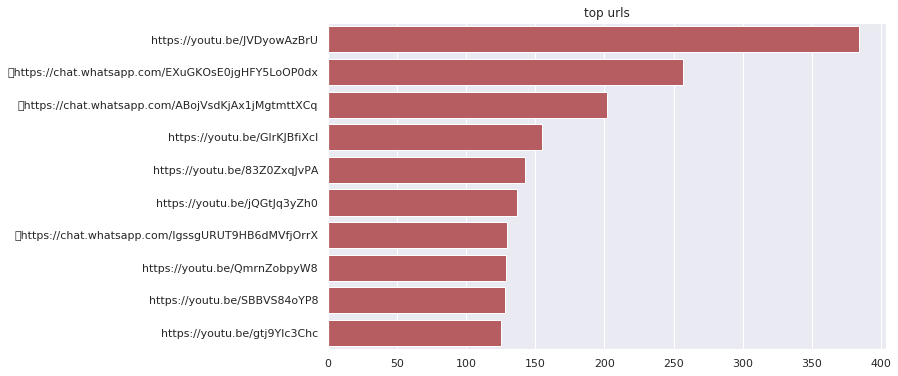

In [51]:
plt.figure(figsize=(10, 6))
plt.title('top urls')
sns.barplot(y=urls[0:10].index,x = urls[0:10].values, color = 'C3')
plt.show()

# Most frequent terms

In [52]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
stopwords = set(stopwords.words('portuguese'))

new_stopwords = ['aí','pra','vão','vou','onde','lá','aqui',
                 'tá','pode','pois','so','deu','agora','todo',
                 'nao','ja','manda','vc', 'bom', 'dia', 'ai',
                 'kkk','kkkk','ta', 'voce', 'alguem', 'ne', 'pq',
                 'cara','to','mim','la','vcs','tbm', 'tudo']
new_stopwords = set(new_stopwords)
stopwords.update(new_stopwords)

In [53]:
allMsgs = ' '.join(list(df[(df['midia'] == 0) & (df['words'] > 3) & 
                                  (df['characters'] < 1000) & (df['url'] == 0)]['text']))
#todasMensagens = [str(m.lower()) for m in todasMensagens]

In [54]:
wordcloud = WordCloud(stopwords = stopwords, background_color="white",width = 800, height = 600).generate(allMsgs)
wordcloud.to_file('plots/'+str(base)+'/wordcloud_all_data.png')

In [55]:
show = False
#plot wordcloud
if show:
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Queries

In [56]:
df_query = df[df.apply(lambda x: haveWord('ptralha',x['text']),axis=1)]
print(len(df_query))
#df_query[0:10]
for m in list(df_query['text'].unique()[0:10]):
    print(m)
    print('***')

82
Mais uma vez o PT deu tiro no pé, veja o que o rapper Mano Brown disse em frente aos PTralhas.
***
ATENÇÃO
Pessoal, estive verificando o que aconteceu no outro grupo.
O número [TELEFONE] é do principal responsável que se infiltrou como administrador. Essa pessoa usa até a imagem a imagem pró Bolsonaro para se infiltrar no grupo.

A ação de excluir os administradores e tomar conta do grupo ocorreu por 4 PTralhas que começaram a remover no mesmo instante.
São eles:
[TELEFONE] (art. 171)
[TELEFONE]
[TELEFONE]
[TELEFONE]
👆🏻Estes foram os principais PTralhas.

Foram adicionados no grupo, principalmente pelo primeiro PTralha 👆🏻os seguintes números também de esquerdopatas:
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE] (art.171)
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE] (art. 171)
[TELEFONE]
[TELEFONE]
[TELEFONE] (art. 171)
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE] (art. 171)
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TEL

In [57]:
# there are some message tagged as misinformation that are not viral?
df[(df['misinformation']==1) & (df['viral']==0)]

id       date                hour ddi country  \
121     4080266983443972531 2018-08-24 1900-01-01 17:00:00  55  BRASIL   
240    -4391661641377612003 2018-09-02 1900-01-01 14:54:00  55  BRASIL   
378     2775036360410899212 2018-09-09 1900-01-01 06:28:00  55  BRASIL   
417     3631133147603888180 2018-09-12 1900-01-01 09:57:00  55  BRASIL   
522    -4391661641377612003 2018-09-20 1900-01-01 14:46:00  55  BRASIL   
...                     ...        ...                 ...  ..     ...   
281053  -695233245073530941 2018-09-07 1900-01-01 19:28:00   ?       ?   
281879  -695233245073530941 2018-10-09 1900-01-01 22:45:00   ?       ?   
281976  -695233245073530941 2018-10-12 1900-01-01 08:15:00   ?       ?   
282059  -695233245073530941 2018-10-15 1900-01-01 22:55:00   ?       ?   
282139  8424212194063834368 2018-10-18 1900-01-01 11:36:00   ?       ?   

       country_iso3 ddd           state    group  midia  url  characters  \
121             BRA  17       São Paulo   2018_1      0    0        2311   
240             BRA  13       São Paulo   2018_1      0    0         299   
378             BRA  24  Rio de Janeiro   2018_1      0    0         208   
417             BRA  17       São Paulo   2018_1      0    0         118   
522             BRA  13       São Paulo   2018_1      0    0         267   
...             ...  ..             ...      ...    ...  ...         ...   
281053            ?   ?               ?  2018_59      0    1         138   
281879            ?   ?               ?  2018_59      0    0         124   
281976            ?   ?               ?  2018_59      0    0         955   
282059            ?   ?               ?  2018_59      0    0         127   
282139            ?   ?               ?  2018_59      0    0       13123   

        words  viral  sharings  \
121       363      0         1   
240        50      0         1   
378        34      0         1   
417        20      0         1   
522        45      0         1   
...       ...    ...       ...   
281053      1      0         1   
281879     20      0         1   
281976    183      0         1   
282059     22      0         1   
282139   2221      0         1   

                                                     text  misinformation  \
121     Há informações fidedignas que o desmoralizado ...               1   
240     Kkkkkk essa acho que nem o Bolsonaro esperava!...               1   
378     Acabou de ser noticiado no *G1*\n😱😱😱\n\nA cand...               1   
417     Saiu o nome da Igreja que está pagando os 4 ad...               1   
522     👇🏿👇🏿👇🏿👇🏿👇🏿👇🏿\n\nProfessor da UFC, Universidade...               1   
...                                                   ...             ...   
281053  https://www.jornaldacidadeonline.com.br/notici...               1   
281879  Jornalista Linhares falando num grupo de jorna...               1   
281976  DEPOIS NÃO QUEREM CHAMÁ-LO DE MITO!\n\n✅ O car...               1   
282059  Gente, escutem este áudio. 👆🏻 O Jair Bolsonaro...               1   
282139  Texto longo. Mas, para quem interessar, uma au...               1   

                 timestamp  
121    2018-08-24 17:00:00  
240    2018-09-02 14:54:00  
378    2018-09-09 06:28:00  
417    2018-09-12 09:57:00  
522    2018-09-20 14:46:00  
...                    ...  
281053 2018-09-07 19:28:00  
281879 2018-10-09 22:45:00  
281976 2018-10-12 08:15:00  
282059 2018-10-15 22:55:00  
282139 2018-10-18 11:36:00  

[1140 rows x 18 columns]

# Unigrams

In [58]:
from collections import Counter

In [59]:
#processed text

#emojis and punctuation
emojis_list = list(emoji.UNICODE_EMOJI.keys()) + ['\n']
punct = list(string.punctuation)
emojis_punct = emojis_list + punct

def processEmojis(text):
    '''
    Put spaces between emojis.
    '''
    #get all unique chars
    chars = set(text)
    #for each unique char in text, do:
    for c in chars:
        if c in emojis_list:
            text = text.replace(c, ' ' + c + ' ')
            
    text = text.replace('  ', ' ')
    return text

def removeEmojis(text):
    '''
    Remove emojis and punctuation.
    '''
    #get all unique chars
    chars = set(text)
    #for each unique char in text, do:
    for c in chars:
        if c in emojis_punct:
            text = text.replace(c,'')
            
    text = text.replace('  ', ' ')
    return text

# removing stop words
spaced_stopwords = []
for sw in stopwords:
    sw = ' '+ sw + ' '
    spaced_stopwords.append(sw)
    
def removeStopwords(text,spaced_stopwords):
    for sw in spaced_stopwords:
        text = text.replace(sw,' ')
    text = text.replace('  ',' ')
    return text

#lemmatization
# nlp = spacy.load('pt_core_news_sm')
# def lemmatization(text):
#     doc = nlp(text)
#     for token in doc:
#         if token.text != token.lemma_:
#             text = text.replace(token.text, token.lemma_)
#     return text
    

def domainUrl(text):
    '''
    Substitutes an URL in a text for the domain of this URL
    Input: an string
    Output: the string with the modified URL
    '''    
    if 'http' in text:
        re_url = '[^\s]*https*://[^\s]*'
        matches = re.findall(re_url, text, flags=re.IGNORECASE)
        for m in matches:
            domain = m.split('//')
            domain = domain[1].split('/')[0]
            text = re.sub(re_url, domain, text, 1)
        return text
    else:
        return text 

def preprocess(text):
    text = text.lower().strip()
    text = domainUrl(text)
    text = processEmojis(text)
    text = removeStopwords(text,spaced_stopwords)
    #text = lemmatization(text)
    return text

In [60]:
onlyText = list(df[(df['midia'] == 0) & (df['url'] == 0)]['text'])

In [61]:
processed_texts_filepath = data_dir + '/vis_processed_texts.p'
if not preprocessed:
    pro_texts = [preprocess(t) for t in onlyText]
    pickle.dump(pro_texts, open(processed_texts_filepath, "wb" ))
else:
    pro_texts = pickle.load(open(processed_texts_filepath, "rb" ))


In [62]:
def get_top_n_ngrams(corpus, ngram = (1,1), n=None):
    vec = CountVectorizer(ngram_range = ngram).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

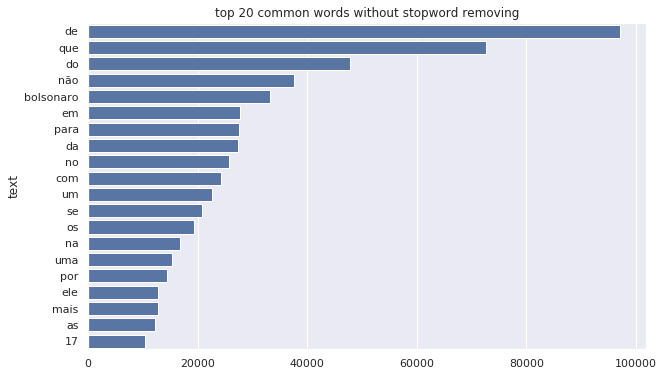

In [63]:
common_words = get_top_n_ngrams(onlyText, ngram = (1,1), n=20)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1 = df1.groupby('text').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.title('top 20 common words without stopword removing')
sns.barplot(y=df1.index,x = df1.values, color = 'C0')
plt.show()

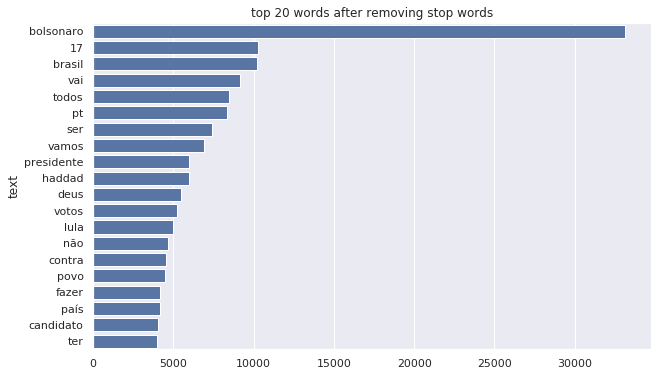

In [64]:
common_words = get_top_n_ngrams(pro_texts, ngram = (1,1), n=20)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1 = df1.groupby('text').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.title('top 20 words after removing stop words')
sns.barplot(y=df1.index,x = df1.values, color = 'C0')
plt.show()

# Bigrams

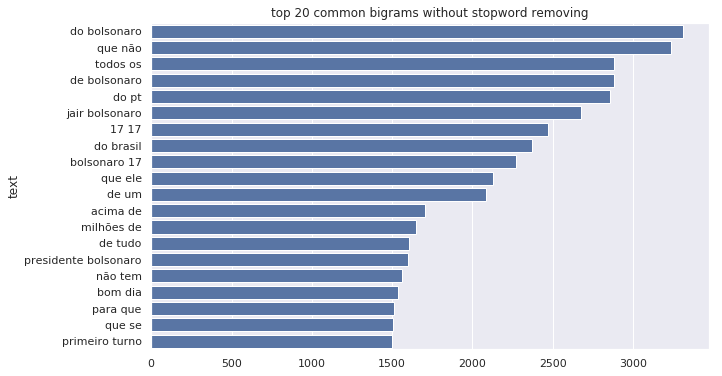

In [65]:
common_bigrams = get_top_n_ngrams(onlyText, ngram = (2,2), n=20)
df1 = pd.DataFrame(common_bigrams, columns = ['text' , 'count'])
df1 = df1.groupby('text').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.title('top 20 common bigrams without stopword removing')
sns.barplot(y=df1.index,x = df1.values, color = 'C0')
plt.show()

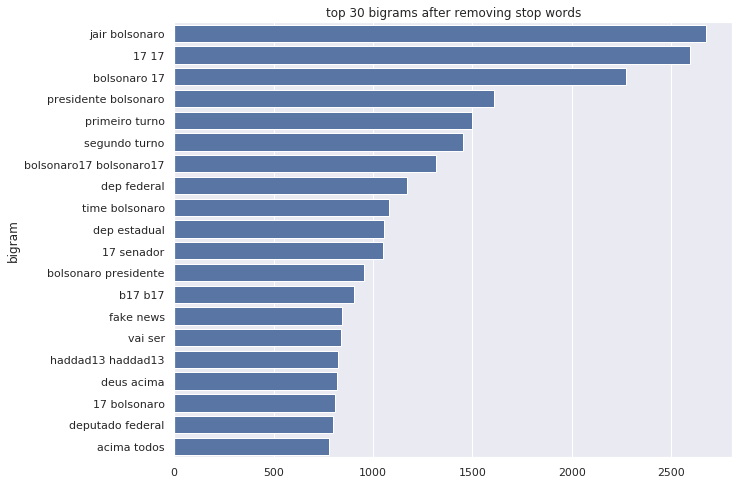

In [66]:
common_bigrams = get_top_n_ngrams(pro_texts, ngram = (2,2), n=20)
df1 = pd.DataFrame(common_bigrams, columns = ['bigram' , 'count'])
df1 = df1.groupby('bigram').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
plt.title('top 30 bigrams after removing stop words')
sns.barplot(y=df1.index,x = df1.values, color = 'C0')
plt.show()

# Trigrams

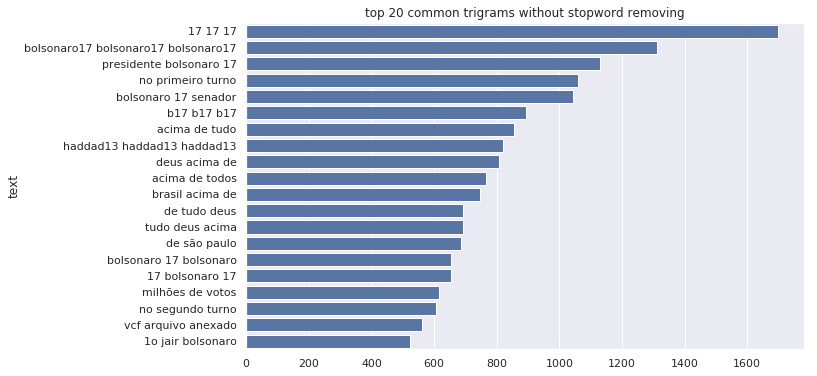

In [67]:
common_trigrams = get_top_n_ngrams(onlyText, ngram = (3,3), n=20)
df1 = pd.DataFrame(common_trigrams, columns = ['text' , 'count'])
df1 = df1.groupby('text').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.title('top 20 common trigrams without stopword removing')
sns.barplot(y=df1.index,x = df1.values, color = 'C0')
plt.show()

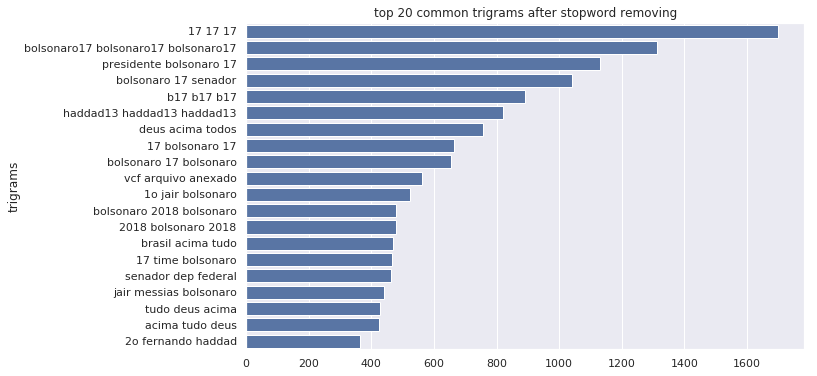

In [68]:
common_trigrams = get_top_n_ngrams(pro_texts, ngram = (3,3), n=20)
df1 = pd.DataFrame(common_trigrams, columns = ['trigrams' , 'count'])
df1 = df1.groupby('trigrams').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.title('top 20 common trigrams after stopword removing')
sns.barplot(y=df1.index,x = df1.values, color = 'C0')
plt.show()

# Ngrams in queries

In [69]:
queryWord = 'gay'
df_query = df[df.apply(lambda x: haveWord(queryWord,x['text']),axis=1)]
queryText = list(df_query[(df_query['midia'] == 0) & (df_query['url'] == 0)]['text'])
pro_query_text = [preprocess(t) for t in queryText]

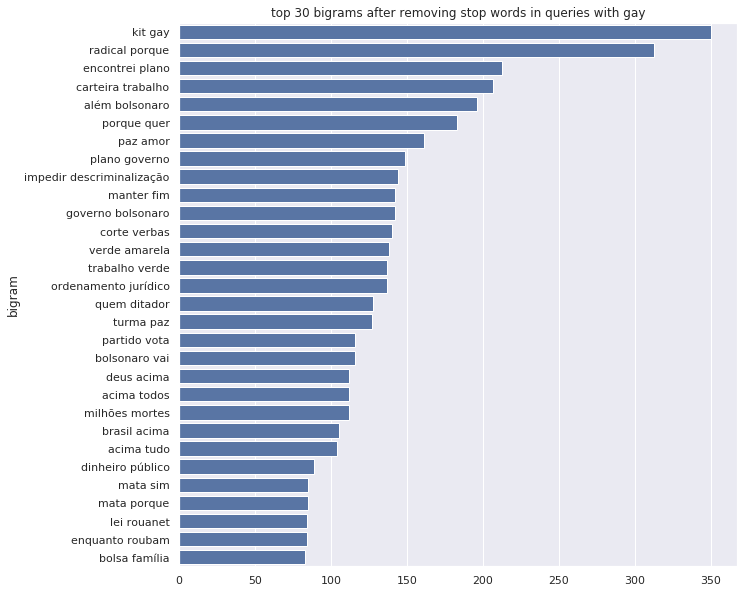

In [70]:
common_bigrams = get_top_n_ngrams(pro_query_text, ngram = (2,2), n=30)
df1 = pd.DataFrame(common_bigrams, columns = ['bigram' , 'count'])
df1 = df1.groupby('bigram').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(10, 10))
plt.title('top 30 bigrams after removing stop words in queries with ' + queryWord)
sns.barplot(y=df1.index,x = df1.values, color = 'C0')
plt.show()

# Words Network analysis

In [71]:
import networkx as nx

In [72]:
pro_texts_noemoji = [removeEmojis(p) for p in pro_texts]
input_list = ' '.join(pro_texts_noemoji).split()

def find_bigrams(input_list):
    return zip(input_list, input_list[1:])

bigrams = find_bigrams(input_list)
bigram_counts = Counter(bigrams)
print(bigram_counts.most_common(20))

[(('jair', 'bolsonaro'), 2588), (('bolsonaro', '17'), 2174), (('17', '17'), 1712), (('presidente', 'bolsonaro'), 1606), (('primeiro', 'turno'), 1485), (('segundo', 'turno'), 1433), (('bolsonaro17', 'bolsonaro17'), 1318), (('dep', 'federal'), 1157), (('time', 'bolsonaro'), 1082), (('senador', '2'), 1061), (('senador', '1'), 1059), (('17', 'senador'), 1054), (('dep', 'estadual'), 1047), (('bolsonaro', 'presidente'), 949), (('1⃣7⃣', '1⃣7⃣'), 939), (('b17', 'b17'), 908), (('vai', 'ser'), 832), (('fake', 'news'), 824), (('haddad13', 'haddad13'), 822), (('deus', 'acima'), 807)]


In [73]:
bigram_df = pd.DataFrame(bigram_counts.most_common(40),
                             columns=['bigram', 'count'])
bigram_df.head()

bigram  count
0        (jair, bolsonaro)   2588
1          (bolsonaro, 17)   2174
2                 (17, 17)   1712
3  (presidente, bolsonaro)   1606
4        (primeiro, turno)   1485

In [74]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [75]:
d[0].items()

dict_items([(('jair', 'bolsonaro'), 2588), (('bolsonaro', '17'), 2174), (('17', '17'), 1712), (('presidente', 'bolsonaro'), 1606), (('primeiro', 'turno'), 1485), (('segundo', 'turno'), 1433), (('bolsonaro17', 'bolsonaro17'), 1318), (('dep', 'federal'), 1157), (('time', 'bolsonaro'), 1082), (('senador', '2'), 1061), (('senador', '1'), 1059), (('17', 'senador'), 1054), (('dep', 'estadual'), 1047), (('bolsonaro', 'presidente'), 949), (('1⃣7⃣', '1⃣7⃣'), 939), (('b17', 'b17'), 908), (('vai', 'ser'), 832), (('fake', 'news'), 824), (('haddad13', 'haddad13'), 822), (('deus', 'acima'), 807), (('17', 'bolsonaro'), 800), (('deputado', 'federal'), 790), (('acima', 'todos'), 745), (('ciro', 'gomes'), 737), (('brasil', 'acima'), 726), (('redes', 'sociais'), 694), (('fernando', 'haddad'), 693), (('boa', 'noite'), 627), (('bolsonaro', '2018'), 622), (('milhões', 'votos'), 618), (('votar', 'bolsonaro'), 605), (('vai', 'ter'), 583), (('177', 'senador'), 569), (('arquivo', 'anexado'), 561), (('bom', 'dia

In [76]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

/home/cabral/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



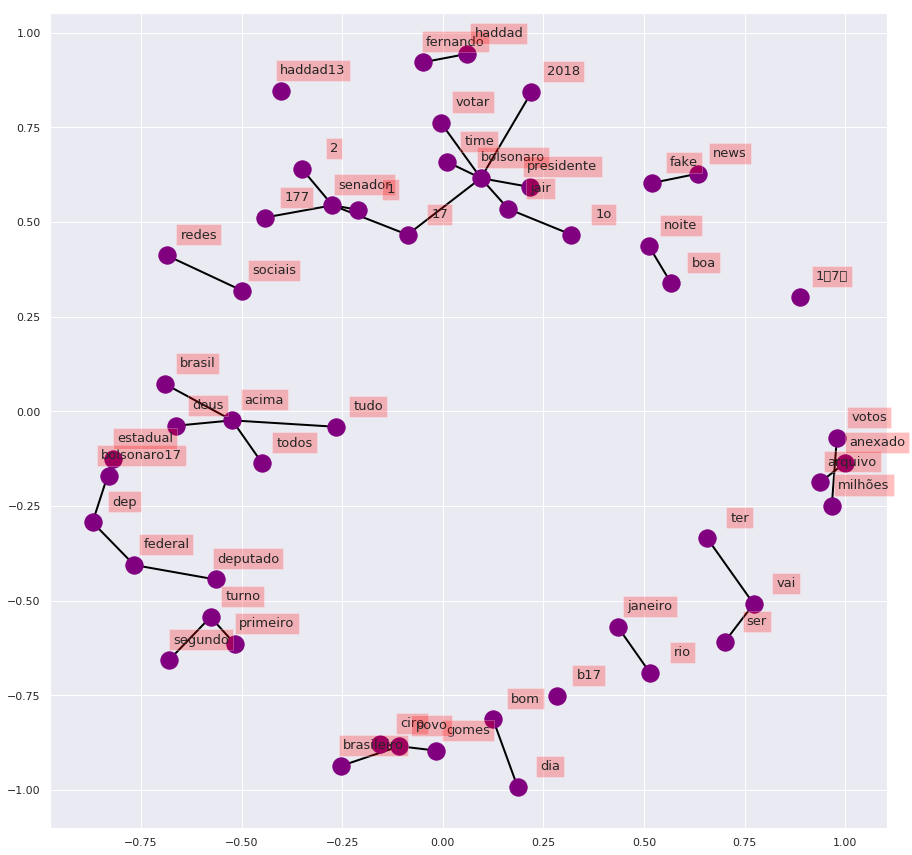

In [77]:
fig, ax = plt.subplots(figsize=(15, 15))

pos = nx.spring_layout(G, k=6)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=2,
                 edge_color='black',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.08, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

## Interactive

In [78]:
from pyvis.network import Network

In [79]:
common_words = get_top_n_ngrams(pro_texts_noemoji, ngram = (1,1), n=50)
df_freq = pd.DataFrame(common_words, columns = ['text' , 'count'])
#df_freq = df_freq.groupby('text').sum()['count'].sort_values(ascending=False)
df_freq.head()

text  count
0  bolsonaro  32440
1     brasil  10167
2        vai   9053
3      todos   8454
4         17   8149

In [80]:
bigram_df = pd.DataFrame(bigram_counts.most_common(100),
                             columns=['bigram', 'count'])
bigram_df.tail()

bigram  count
95                                  (bolsonaro, hoje)    267
96                                   (votos, válidos)    266
97  (eufaçocampanhadegraçaparabolsonaro, eufaçocam...    266
98                                  (forças, armadas)    262
99                                      (acima, deus)    260

In [81]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

In [82]:
d = bigram_df.set_index('bigram').T.to_dict('records')

In [83]:
net = Network(width = '900px', height = '400px',notebook = True)
toptokens = df_freq.sort_values(by='count', ascending=False).head(50)

# Create nodes
for index, row in toptokens.iterrows():               
    net.add_node(row['text'], label=row['text'], value = row['count'])
    
# Create connections between nodes
for k, v in d[0].items():
    #k = k.split()
    if(k[0] in list(toptokens['text']) and k[1] in list(toptokens['text'])):
        net.add_edge(k[0], k[1], weight= v*100)
        print(k[0] + "," + k[1])

jair,bolsonaro
bolsonaro,17
17,17
presidente,bolsonaro
primeiro,turno
segundo,turno
17,senador
bolsonaro,presidente
vai,ser
17,bolsonaro
milhões,votos
votar,bolsonaro
vai,ter
vamos,fazer
bolsonaro,vai
contra,bolsonaro
campanha,bolsonaro
fazer,campanha
presidente,brasil
governo,lula
voto,bolsonaro
governo,bolsonaro
vai,votar
bolsonaro,hoje


In [84]:
net = Network(width = '1000px', height = '800px',notebook = True)
toptokens = df_freq.sort_values(by='count', ascending=False).head(50)
    
# Create connections between nodes
for k, v in d[0].items():
    net.add_node(k[0], label = k[0], value = v)
    net.add_node(k[1], label = k[1], value = v)
    net.add_edge(k[0], k[1], weight= v*100)
    #print(k[0] + "," + k[1])

In [85]:
# net.set_options(
#     var options = {
#       "physics": {
#         "repulsion": {
#           "nodeDistance": 100
#         },
#         "maxVelocity": 6,
#         "minVelocity": 0.75,
#         "solver": "repulsion"
#       }
#     } )

In [86]:
#net.show_buttons(filter_=['physics'])
network_file = 'plots/' + base + '/network.html'
#net.save_graph(network_file)
#net.show(network_file)

# Research challenges
* Misinformation detection by text
* Misinformation detection by metadata
* Misinformation spread analysis
* Bot detection
* Hate speech detection